In [9]:
import numpy as np
import imageio

import matplotlib.pyplot as plt

In [10]:
BASE_DIR = '../tests/input_images'
in_image_filename = f'{BASE_DIR}/baboon.png'
filter_filename = f'{BASE_DIR}/baboon_filter3.png'
ref_image_filename = f'{BASE_DIR}/baboon_filter3_ref.png'
in_image = imageio.imread(in_image_filename)
filter_image = imageio.imread(filter_filename)
ref_image = imageio.imread(ref_image_filename)

(-0.5, 255.5, 255.5, -0.5)

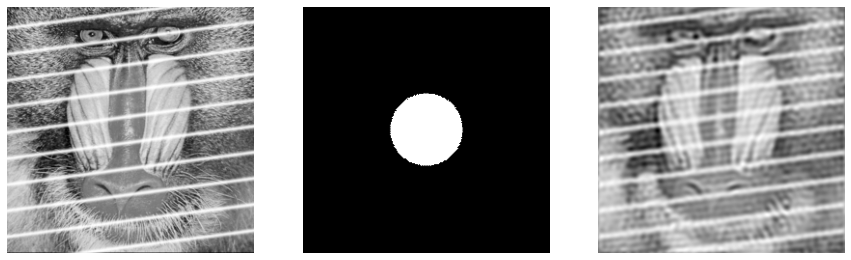

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(in_image, cmap="gray")
plt.axis('off')
plt.subplot(132)
plt.imshow(filter_image, cmap="gray")
plt.axis('off')
plt.subplot(133)
plt.imshow(ref_image, cmap="gray")
plt.axis('off')

In [12]:
def dft2d(image):
    return np.fft.fft2(image)

freq_image = dft2d(in_image)

In [13]:
def prepare_filter(filter_image):
    return filter_image // 255

def frequency_domain_filter(image, filter_image):
    shifted = np.fft.fftshift(image)
    filtered_shifted = np.multiply(shifted, filter_image)
    filtered = np.fft.ifftshift(filtered_shifted)
    return filtered

norm_filter = prepare_filter(filter_image)
filtered_image = frequency_domain_filter(freq_image, norm_filter)

In [14]:
def idft2d(freq_image):
    return np.fft.ifft2(freq_image)

final_image = idft2d(filtered_image)

In [15]:
def normalise_image(image):
    imax = np.max(image)
    imin = np.min(image)
    image_norm = (image - imin)/(imax - imin)
    image_norm = (image_norm * 255).astype(np.uint8)
    return image_norm

normalised_final_image = normalise_image(final_image.real)

In [16]:
# Calculate error
def root_mean_sq_err(ref_image, gen_image):
    n, m = gen_image.shape
    subtracted_image = gen_image.astype(float) - ref_image.astype(float)
    squared_image = np.square(subtracted_image)
    mean_image = squared_image/(n*m)
    err = np.sum(mean_image)
    
    return np.sqrt(err)

rmse = root_mean_sq_err(ref_image, normalised_final_image)
print(f'{rmse:.4f}')

0.7092
